### A quick look at the duplicate feature found by Laurae and LiShubin:

In [1]:
library(data.table)
library(ggplot2)


train_numeric_sparse <- readRDS("/Users/alexpapiu/Documents/Data/Bosh/train_numeric.rds")
dupped = fread('https://raw.githubusercontent.com/apapiu/bosh/master/data_dupped4.csv?token=AM_Q2W0L8C-Q-i01v2YlE_eDB7agj7DMks5X-fvIwA%3D%3D')



In [15]:
options(repr.plot.width=6, repr.plot.height=4)

In [2]:
dupped_train = dupped[1:nrow(train_numeric_sparse)]$x

Let's take a look at the proportions:

In [5]:
prop.table(table(dupped_train, train_numeric_sparse$Response), 1)

            
dupped_train           0           1
       FALSE 0.995419088 0.004580912
       TRUE  0.965982820 0.034017180

Whoa as Shubin mentioned this is huge. Basically for the duplicates the failure rate is around 3.4% while for the non-duplicates it's 0.45%.

In [6]:
0.034017180/0.004580912

[1] 7.425853

In [8]:
duplicates = data.frame(dupped = dupped_train, Response = train_numeric_sparse$Response)

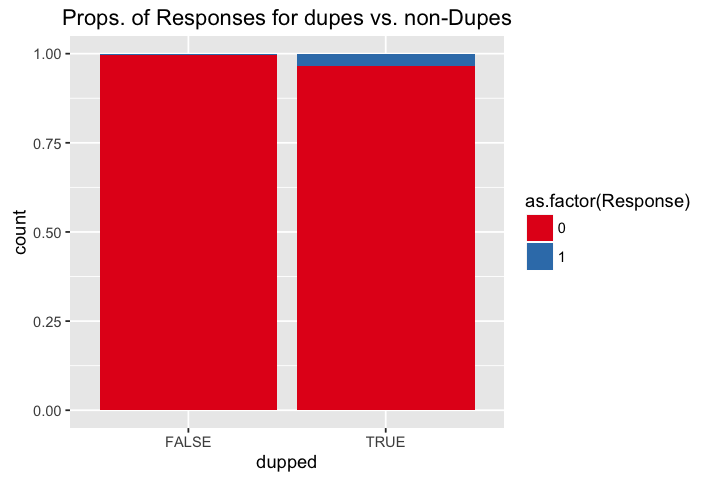

In [17]:
ggplot(duplicates, aes(x = dupped, fill = as.factor(Response))) + 
    geom_bar(position = "fill") +
    scale_fill_brewer(palette = "Set1") +
    ggtitle("Props. of Responses for dupes vs. non-Dupes")